In [1]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.7 MB/s eta 0:00:00


In [2]:
#Import necessary library for scraping data
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from wordcloud import WordCloud, STOPWORDS
from google.colab import files
from docx import Document

import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.cluster import KMeans
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Data Preprocessing

In [3]:
url = 'https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=innings'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

response = requests.get(url, headers=headers)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table (more specific selection)
table = soup.find_all('table', class_='engineTable')[3]

# Extract headers (check for correct tag)
# Assuming headers are in 'tr' with class 'headings'
header_row = table.find_all('tr')
headers = [th.text.strip() for th in header_row[0].find_all('th')] if header_row else []


data = []
for row in header_row[1:]:
        cells = row.find_all("td")
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)
kholi_batting_df = pd.DataFrame(data, columns=headers)
kholi_batting_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
0,12,33,22,1,0,54.54,2,lbw,1,,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
1,37,82,67,6,0,55.22,2,caught,2,,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
2,25,40,38,4,0,65.78,1,run out,1,,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
3,54,87,66,7,0,81.81,1,bowled,1,,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755
4,31,45,46,3,1,67.39,1,lbw,2,,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,84,135,98,5,0,85.71,3,caught,2,,v Australia,Dubai (DICS),4 Mar 2025,ODI # 4853
301,1,4,2,0,0,50.00,3,lbw,2,,v New Zealand,Dubai (DICS),9 Mar 2025,ODI # 4858
302,0,12,8,0,0,0.00,3,caught,1,,v Australia,Perth,19 Oct 2025,ODI # 4911
303,0,3,4,0,0,0.00,3,lbw,1,,v Australia,Adelaide,23 Oct 2025,ODI # 4913


In [4]:
#Remove 'v' form opposition column
kholi_batting_df['Opposition'] = kholi_batting_df['Opposition'].str.replace('v', '')
kholi_batting_df = kholi_batting_df.iloc[: , : -1]
kholi_batting_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,,Sri Lanka,Dambulla,18 Aug 2008
1,37,82,67,6,0,55.22,2,caught,2,,Sri Lanka,Dambulla,20 Aug 2008
2,25,40,38,4,0,65.78,1,run out,1,,Sri Lanka,Colombo (RPS),24 Aug 2008
3,54,87,66,7,0,81.81,1,bowled,1,,Sri Lanka,Colombo (RPS),27 Aug 2008
4,31,45,46,3,1,67.39,1,lbw,2,,Sri Lanka,Colombo (RPS),29 Aug 2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,84,135,98,5,0,85.71,3,caught,2,,Australia,Dubai (DICS),4 Mar 2025
301,1,4,2,0,0,50.00,3,lbw,2,,New Zealand,Dubai (DICS),9 Mar 2025
302,0,12,8,0,0,0.00,3,caught,1,,Australia,Perth,19 Oct 2025
303,0,3,4,0,0,0.00,3,lbw,1,,Australia,Adelaide,23 Oct 2025


In [5]:
print("######## Replace '-' with DNB  ############: ")
kholi_batting_df = kholi_batting_df.applymap(lambda x: x.replace('-', 'dnb') if isinstance(x, str) else x)

print("Replace 'TDNB' with 0 in Runs Colimn")
kholi_batting_df['Runs'] = kholi_batting_df['Runs'].replace('TDNB', 0)
kholi_batting_df

kholi_batting_df.to_csv('kholi_batting_df.csv', index=False)
files.download('kholi_batting_df.csv')

######## Replace '-' with DNB  ############: 
Replace 'TDNB' with 0 in Runs Colimn


/tmp/ipython-input-1156894865.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kholi_batting_df = kholi_batting_df.applymap(lambda x: x.replace('-', 'dnb') if isinstance(x, str) else x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
print("######## Split Start Date column in to seprate date month and year ############: ")

kholi_batting_df[["Day","Month","Year"]] = kholi_batting_df["Start Date"].str.split(' ', expand=True)
kholi_batting_df.drop('Day', axis=1, inplace=True)
kholi_batting_df.drop('Start Date', axis=1, inplace=True)

print("Convert the Runs column to numeric")
kholi_batting_df['Runs'] = kholi_batting_df['Runs'].replace(r'\*', '', regex=True)
kholi_batting_df['Runs'] = pd.to_numeric(kholi_batting_df['Runs'], errors='coerce')
kholi_batting_df

######## Split Start Date column in to seprate date month and year ############: 
Convert the Runs column to numeric


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Month,Year
0,12.0,33,22,1,0,54.54,2,lbw,1,,Sri Lanka,Dambulla,Aug,2008
1,37.0,82,67,6,0,55.22,2,caught,2,,Sri Lanka,Dambulla,Aug,2008
2,25.0,40,38,4,0,65.78,1,run out,1,,Sri Lanka,Colombo (RPS),Aug,2008
3,54.0,87,66,7,0,81.81,1,bowled,1,,Sri Lanka,Colombo (RPS),Aug,2008
4,31.0,45,46,3,1,67.39,1,lbw,2,,Sri Lanka,Colombo (RPS),Aug,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,84.0,135,98,5,0,85.71,3,caught,2,,Australia,Dubai (DICS),Mar,2025
301,1.0,4,2,0,0,50.00,3,lbw,2,,New Zealand,Dubai (DICS),Mar,2025
302,0.0,12,8,0,0,0.00,3,caught,1,,Australia,Perth,Oct,2025
303,0.0,3,4,0,0,0.00,3,lbw,1,,Australia,Adelaide,Oct,2025


In [7]:
# Drop the unknown column
kholi_batting_df = kholi_batting_df.drop(columns=[col for col in kholi_batting_df.columns if col in [None, '']])

print("Dataset after dropping the unnamed column:")
filter = kholi_batting_df[kholi_batting_df["Ground"] == "Centurion"]
filter


Dataset after dropping the unnamed column:


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Month,Year
6,16.0,28,24,1,0,66.66,4,caught,2,Pakistan,Centurion,Sep,2009
7,0.0,dnb,dnb,dnb,dnb,dnb,dnb,dnb,dnb,Australia,Centurion,Sep,2009
44,2.0,11,6,0,0,33.33,3,caught,2,South Africa,Centurion,Jan,2011
124,0.0,dnb,dnb,dnb,dnb,dnb,dnb,dnb,dnb,South Africa,Centurion,Dec,2013
203,46.0,64,50,4,1,92.00,3,not out,2,South Africa,Centurion,Feb,2018
207,129.0,123,96,19,2,134.37,3,not out,2,South Africa,Centurion,Feb,2018


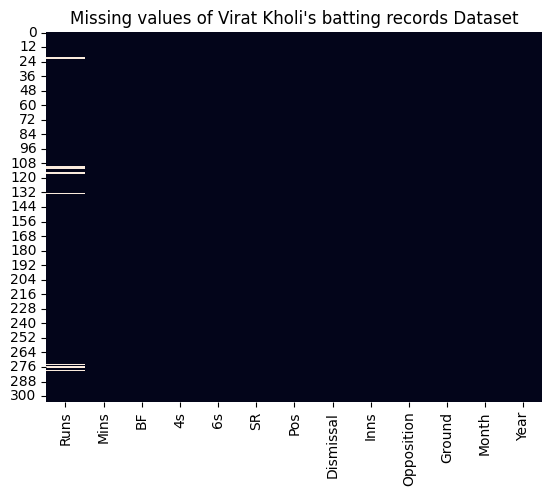

Missing Values Attribute with column name:
Runs          8
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Month         0
Year          0
dtype: int64


In [8]:
#check missing values
sns.heatmap(kholi_batting_df.isnull(), cbar=False)
plt.title("Missing values of Virat Kholi's batting records Dataset")
plt.show()

missing_values = kholi_batting_df.isnull().sum()

print("Missing Values Attribute with column name:")
print(missing_values)

In [9]:
#check '?' in the dataset
print("####### Column contains '?' #########")
columns_with_question_mark = kholi_batting_df.apply(lambda col: col.astype(str).str.contains(r'\?', na=False).any())
print("Columns containing '?':")
if columns_with_question_mark[columns_with_question_mark].sum() < 1:
  print("No columns contains '?'")

else:
  print("Columns containing '?':")
  print(columns_with_question_mark[columns_with_question_mark].sum())


####### Column contains '?' #########
Columns containing '?':
No columns contains '?'


# Exploratory Data Analysis


######## Batting Average by Country ##########:




Text(0, 0.5, 'Batting Average')

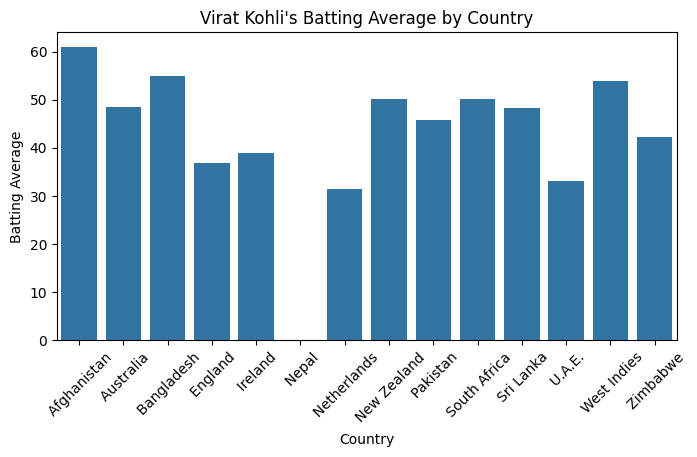

In [10]:
print("######## Batting Average by Country ##########:\n\n")
kholi_batting_df['Runs'] = pd.to_numeric(kholi_batting_df['Runs'], errors='coerce')
batting_average_by_country = kholi_batting_df.groupby('Opposition')['Runs'].mean()
batting_average_by_country

#Bar Plot for batting avg by country
plt.figure(figsize=(8, 4))
sns.barplot(x=batting_average_by_country.index, y=batting_average_by_country.values)
plt.xticks(rotation=45)
plt.title("Virat Kohli's Batting Average by Country")
plt.xlabel("Country")
plt.ylabel("Batting Average")

######## Batting Average by Ground ##########:




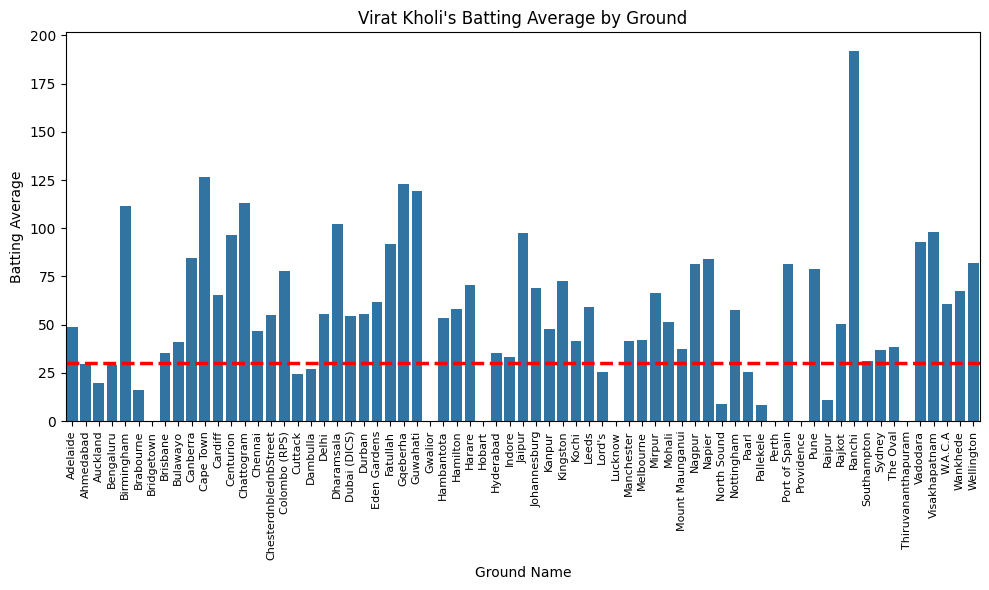

In [11]:
print("######## Batting Average by Ground ##########:\n\n")
kholi_batting_df['Runs'] = pd.to_numeric(kholi_batting_df['Runs'], errors='coerce')
batting_average_by_ground = kholi_batting_df.groupby('Ground')['Runs'].sum()

valid_dismissals = kholi_batting_df[~kholi_batting_df['Dismissal'].isin(['not out', 'dnb'])]
number_dismissal_by_ground = valid_dismissals.groupby("Ground").agg(
    Dismissals = ('Dismissal', 'count'),
)

batting_avg_ground = batting_average_by_ground / number_dismissal_by_ground['Dismissals']


#Bar Plot for batting avg by country
plt.figure(figsize=(10, 6))
sns.barplot(x=batting_avg_ground.index, y=batting_avg_ground.values)

# Add a horizontal line at y=50
plt.axhline(y=30, color='red', linestyle='--', linewidth=2.5, label='Target Average')
plt.xticks(rotation=90, fontsize=8)
plt.title("Virat Kholi's Batting Average by Ground")
plt.xlabel("Ground Name")
plt.ylabel("Batting Average")
plt.tight_layout()
plt.show()

###### Number of Matches Each Ground Played ######:




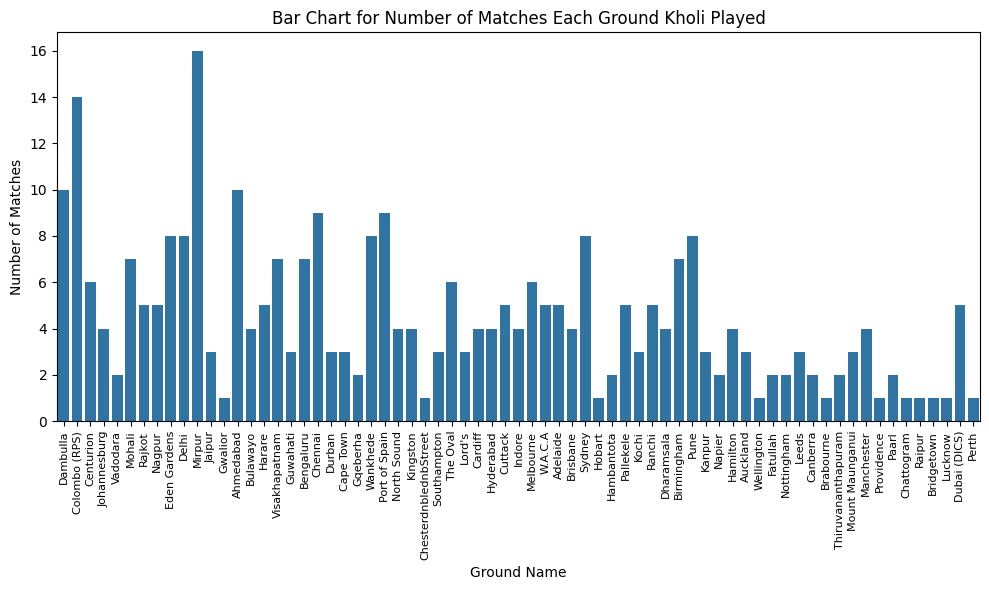

In [12]:
print("###### Number of Matches Each Ground Played ######:\n\n")
#Bar char for ground types
plt.figure(figsize=(10, 6))
sns.countplot(data=kholi_batting_df, x='Ground')
plt.xticks(rotation=90, fontsize=8)
plt.title("Bar Chart for Number of Matches Each Ground Kholi Played")
plt.xlabel("Ground Name")
plt.ylabel("Number of Matches")
plt.tight_layout()
# Show the plot
plt.show()

######## Number of Dissmisals by Type ##########:




/tmp/ipython-input-568452789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=kholi_batting_df, x='Dismissal', palette='Set2')


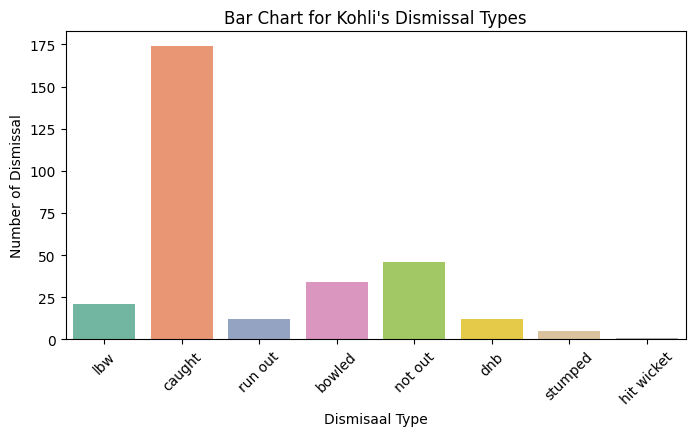

In [13]:
print("######## Number of Dissmisals by Type ##########:\n\n")
#Bar char for dismissal types
plt.figure(figsize=(8, 4))
sns.countplot(data=kholi_batting_df, x='Dismissal', palette='Set2')
plt.xticks(rotation=45)
plt.title("Bar Chart for Kohli's Dismissal Types")
plt.xlabel("Dismisaal Type")
plt.ylabel("Number of Dismissal")
# Show the plot
plt.show()

######## Number of Catch by Country ##########:




/tmp/ipython-input-3489902820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_caught_by_country.index, y=num_caught_by_country.values, palette="Set1")


Text(0, 0.5, 'Number of Catch Out')

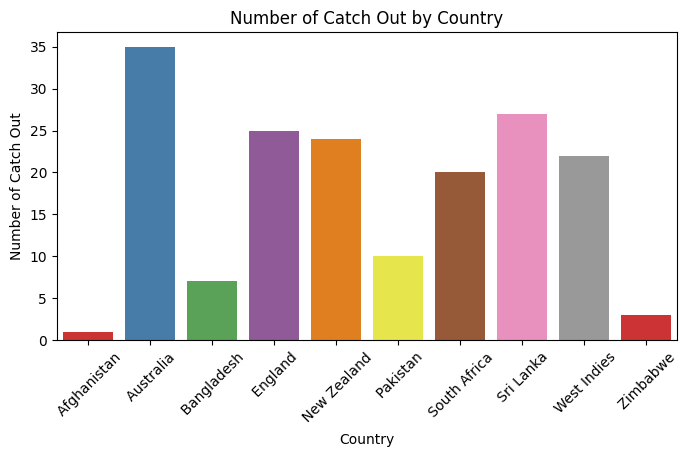

In [14]:
print("######## Number of Catch by Country ##########:\n\n")

num_caught_by_country = kholi_batting_df[kholi_batting_df['Dismissal'] == 'caught'].groupby('Opposition').size()
#Bar Plot for batting avg by country
plt.figure(figsize=(8, 4))
sns.barplot(x=num_caught_by_country.index, y=num_caught_by_country.values, palette="Set1")
plt.xticks(rotation=45)
plt.title("Number of Catch Out by Country")
plt.xlabel("Country")
plt.ylabel("Number of Catch Out")

######## Number of Caught by Ground ##########:




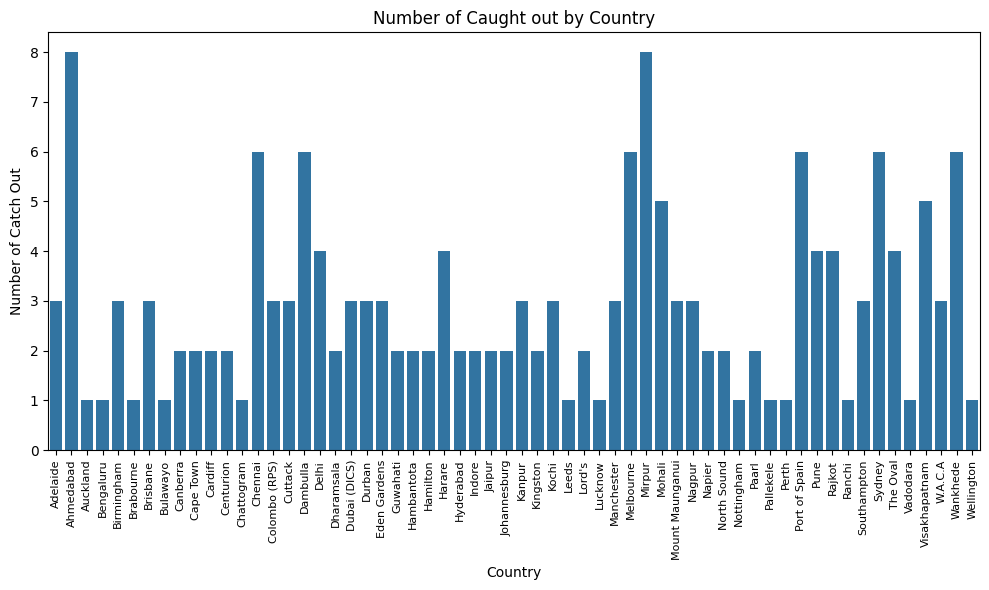

In [15]:
print("######## Number of Caught by Ground ##########:\n\n")

num_caught_by_country = kholi_batting_df[kholi_batting_df['Dismissal'] == 'caught'].groupby('Ground').size()
#Bar Plot for batting avg by country
plt.figure(figsize=(10, 6))
sns.barplot(x=num_caught_by_country.index, y=num_caught_by_country.values)
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of Caught out by Country")
plt.xlabel("Country")
plt.ylabel("Number of Catch Out")
plt.tight_layout()
plt.show()

######## Number of Caught by Innings ##########:




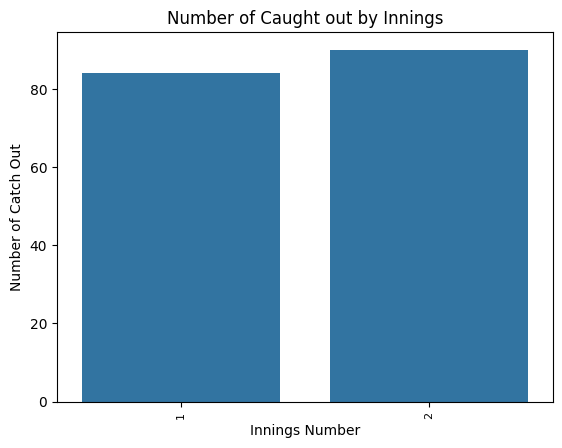

In [16]:
print("######## Number of Caught by Innings ##########:\n\n")

num_caught_by_inns = kholi_batting_df[kholi_batting_df['Dismissal'] == 'caught'].groupby('Inns').size()
#Bar Plot for batting avg by country
sns.barplot(x=num_caught_by_inns.index, y=num_caught_by_inns.values)
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of Caught out by Innings")
plt.xlabel("Innings Number")
plt.ylabel("Number of Catch Out")
plt.show()

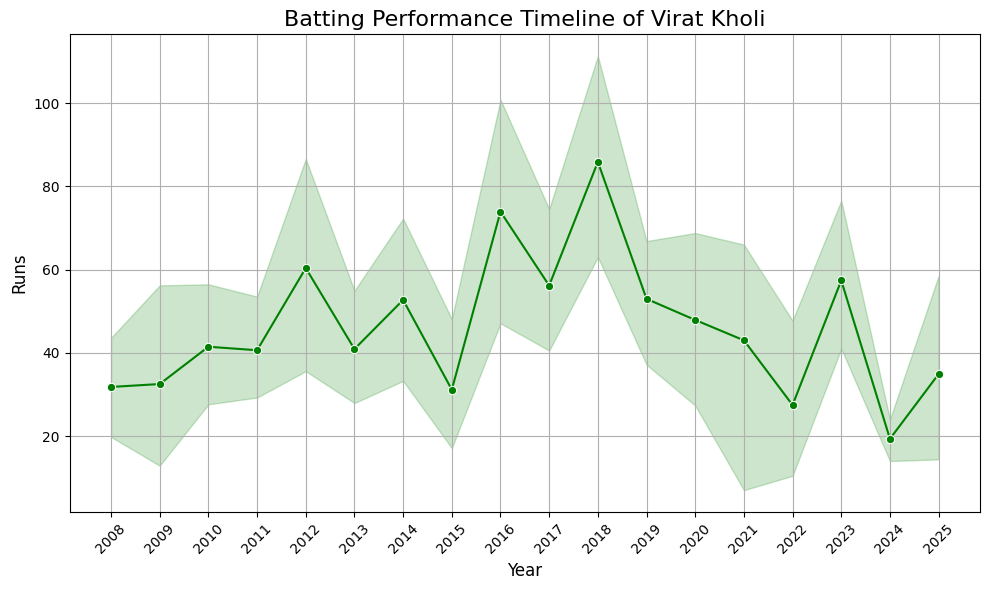

In [17]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Runs', data=kholi_batting_df, marker='o', color='green')

# Add labels and title
plt.title("Batting Performance Timeline of Virat Kholi", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Runs", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

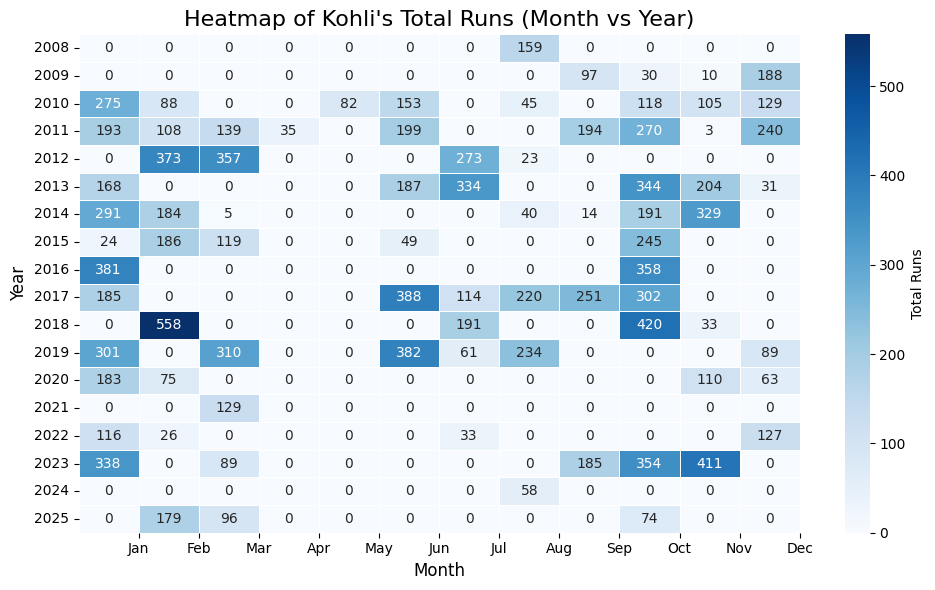

In [18]:
# Ensure 'Year' and 'Month' are properly formatted
kholi_batting_df['Year'] = pd.to_numeric(kholi_batting_df['Year'], errors='coerce')
kholi_batting_df['Month'] = pd.to_datetime(kholi_batting_df['Month'], errors='coerce', format='%b').dt.month
kholi_batting_df['Runs'] = pd.to_numeric(kholi_batting_df['Runs'], errors='coerce')


heatmap_data = kholi_batting_df.pivot_table(
    index="Year",
    columns="Month",
    values="Runs",
    aggfunc="sum"
).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Total Runs'})

plt.title("Heatmap of Kohli's Total Runs (Month vs Year)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [19]:
print("######## Batting Average by Ground and Month ##########:\n\n")
batting_average_by_ground = kholi_batting_df.groupby('Ground')['Runs'].sum()

valid_dismissals = kholi_batting_df[~kholi_batting_df['Dismissal'].isin(['not out', 'dnb'])]
number_dismissal_by_ground = valid_dismissals.groupby("Ground").agg(
    Dismissals = ('Dismissal', 'count'),
)

batting_avg_ground = batting_average_by_ground / number_dismissal_by_ground['Dismissals']
filtered_val = batting_avg_ground[batting_avg_ground < 30]
print(filtered_val.to_string())

######## Batting Average by Ground and Month ##########:


Ground
Ahmedabad      29.800000
Auckland       19.666667
Bengaluru      29.000000
Brabourne      16.000000
Cuttack        24.600000
Dambulla       27.000000
Lord's         25.666667
Lucknow         0.000000
North Sound     9.000000
Paarl          25.500000
Pallekele       8.500000
Perth           0.000000
Raipur         11.000000


In [21]:
# Upload file interactively
uploaded = files.upload()



Saving catch_out.docx to catch_out.docx


In [22]:
# Read the uploaded DOCX file
file_name = list(uploaded.keys())[0]  # Get the first uploaded file name
doc = Document(file_name)

# Print the content of the document
for para in doc.paragraphs:
    text = para.text

text

"stepping out and slicing a full delivery hick edge has gone That ball landed on a good length outside off stump of the long off boundary  gets the edge through to the keeper He pitches just short of a length outside off  towards long-on not into the outside off stump this time Big turning delivery seems to beat the edge outside off  the angle induces yet another outside edge Kohli's nightmare outside off continues that's turned a fair bit from an off-stump line Good length  Fuller on the stumps Vince swallowed a fat outside edge exploding past his edge they get him outside off This is very, very full and wide outside off Slower short ball, he looks to pull from outside off Kohli holes out to long off He looks to dab the back of length delivery towards third man This is short of length just outside off  Kohli has picked out mid-on but straight to Cook at mid-off  Kohli tried to clear long-off Entices the new man with a floated delivery outside off, That was tossed up on off stump "

In [23]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.replace('outside off', 'outside_off')
  text = text.replace('full length', 'full_length')
  text = text.replace('short of length', 'short_of_length')
  text = text.replace('back of a length', 'back_of_a_length')
  text = text.replace('outside edge', 'outside_edge')
  text = text.replace('outside off stump', 'outside_off_stump')
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  words = [word for word in words if word not in stop_words]
  return ' '.join(words)

preprocessed_text = preprocess_text(text)
preprocessed_text


'stepping slicing full delivery hick edge gone ball landed good length outside_off stump long boundary gets edge keeper pitches short length outside_off towards long outside_off stump time big turning delivery seems beat edge outside_off angle induces yet another outside_edge kohli nightmare outside_off continues turned fair bit stump line good length fuller stumps vince swallowed fat outside_edge exploding past edge get outside_off full wide outside_off slower short ball looks pull outside_off kohli holes long looks dab back length delivery towards third man short_of_length outside_off kohli picked mid straight cook mid kohli tried clear long entices new man floated delivery outside_off tossed stump'

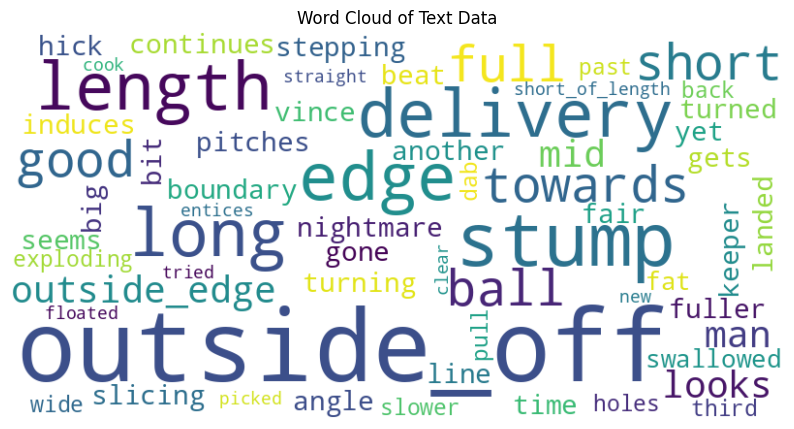

In [24]:
#Exclude Word
exclude_word = {"pitch","kohli","tossed"}
custom_stopwords = STOPWORDS.union(exclude_word)
#Word Cloud Visualization
wordcloud = WordCloud(stopwords=custom_stopwords, width=800, height=400, background_color='white').generate(preprocessed_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()

Saving pitch_report.docx to pitch_report.docx


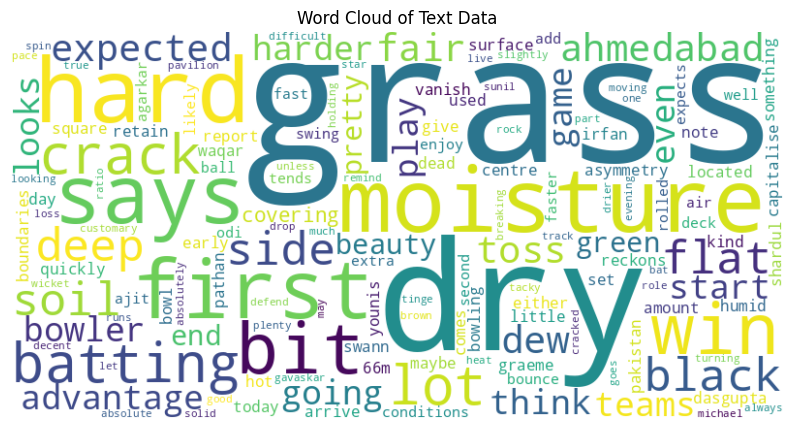

In [25]:
# Upload file interactively
uploaded = files.upload()

# Read the uploaded DOCX file
file_name = list(uploaded.keys())[0]  # Get the first uploaded file name
doc = Document(file_name)

# Print the content of the document
for para in doc.paragraphs:
    text = para.text

text

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.replace('outside off', 'outside_off')
  text = text.replace('full length', 'full_length')
  text = text.replace('short of length', 'short_of_length')
  text = text.replace('back of a length', 'back_of_a_length')
  text = text.replace('outside edge', 'outside_edge')
  text = text.replace('outside off stump', 'outside_off_stump')
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  words = [word for word in words if word not in stop_words]
  return ' '.join(words)

preprocessed_text = preprocess_text(text)
preprocessed_text

#Exclude Word
exclude_word = {"pitch","kohli","tossed"}
custom_stopwords = STOPWORDS.union(exclude_word)
#Word Cloud Visualization
wordcloud = WordCloud(stopwords=custom_stopwords, width=800, height=400, background_color='white').generate(preprocessed_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()